In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:09<00:00, 140MB/s]
100% 1.06G/1.06G [00:09<00:00, 119MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [5]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

58889256/58889256 [==============================] - 11s 0us/step


In [6]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [7]:
conv_base.trainable = False

In [8]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array,img_to_array, load_img

In [9]:
# DATA AUGMENTATION


batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary') 

validation_generator = test_datagen.flow_from_directory(
        '/content/test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
history = model.fit_generator(
        train_generator,
        epochs=10,
        validation_data=validation_generator)

<ipython-input-11-b2b64d53260b>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
625/625 [==============================] - 182s 277ms/step - loss: 0.3050 - accuracy: 0.8699 - val_loss: 0.2150 - val_accuracy: 0.9066
Epoch 2/10
625/625 [==============================] - 173s 277ms/step - loss: 0.2426 - accuracy: 0.8964 - val_loss: 0.2086 - val_accuracy: 0.9152
Epoch 3/10
625/625 [==============================] - 170s 272ms/step - loss: 0.2247 - accuracy: 0.9010 - val_loss: 0.1984 - val_accuracy: 0.9182
Epoch 4/10
625/625 [==============================] - 171s 274ms/step - loss: 0.2099 - accuracy: 0.9107 - val_loss: 0.2013 - val_accuracy: 0.9146
Epoch 5/10
625/625 [==============================] - 171s 274ms/step - loss: 0.1995 - accuracy: 0.9161 - val_loss: 0.1910 - val_accuracy: 0.9184
Epoch 6/10
625/625 [==============================] - 170s 272ms/step - loss: 0.1893 - accuracy: 0.9183 - val_loss: 0.2016 - val_accuracy: 0.9134
Epoch 7/10
625/625 [==============================] - 171s 273ms/step - loss: 0.1842 - accuracy: 0.9215 - val_loss: 0.1901 -

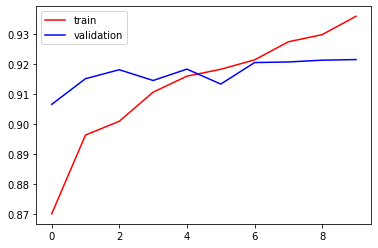

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

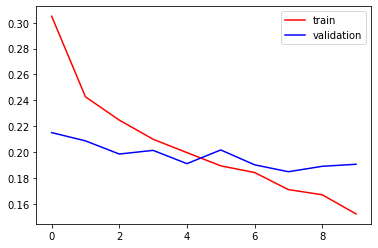

In [13]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [14]:
# Testing on unseen data

import cv2

test_img = cv2.imread('/content/cat.jpg')

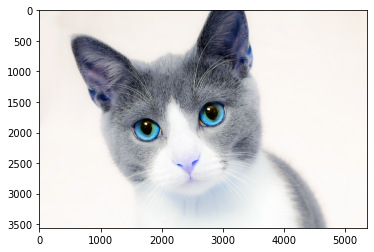

In [15]:
plt.imshow(test_img)

In [21]:
test_img = cv2.resize(test_img,(150,150))

In [22]:
test_input = test_img.reshape((1,150,150,3))

In [23]:
model.predict(test_input)

1/1 [==============================] - 1s 877ms/step


array([[0.]], dtype=float32)

In [24]:
test_img = cv2.imread('/content/dog.jpg')

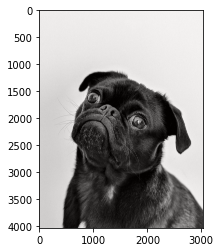

In [25]:
plt.imshow(test_img)

In [26]:
test_img = cv2.resize(test_img,(150,150))

In [27]:
test_input = test_img.reshape((1,150,150,3))

In [28]:
model.predict(test_input)

1/1 [==============================] - 0s 21ms/step


array([[1.]], dtype=float32)